### Construct numpy arrays of train and test set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from tqdm import tqdm
from keras.utils import np_utils
import helpers

Using TensorFlow backend.


In [2]:
def crop_and_resize(img, resize_dim=299):
    
    #val = 240
    #y,x,channel = img.shape
    #startx = x//2-(resize_dim//2)
    #starty = y//2-(resize_dim//2)
    #img = img[starty:starty+resize_dim,startx:startx+resize_dim]
    img=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    
    return img

def get_data(path):
    
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=crop_and_resize(img)
    return img

In [3]:
#Root directory of the project
ROOT_DIR = os.path.abspath(".")
# Training file directory
DATASET = os.path.join(ROOT_DIR, 'dataset')
DATASET

'C:\\Users\\Hasib\\Desktop\\works\\lesion-learnt\\dataset'

In [4]:
os.listdir(DATASET + "/ISIC2016")

['ISBI2016_ISIC_Part3_Test_Data',
 'ISBI2016_ISIC_Part3_Test_GroundTruth.csv',
 'ISBI2016_ISIC_Part3_Training_Data',
 'ISBI2016_ISIC_Part3_Training_GroundTruth.csv',
 'x_aug_5400.npy',
 'x_test.npy',
 'x_train.npy',
 'y_aug_5400.npy',
 'y_test.npy',
 'y_train.npy']

In [5]:
# IMAGES PATH
IMAGES = os.path.join(DATASET, 'ISIC2016', 'ISBI2016_ISIC_Part3_Training_Data')
# GROUND TRUTH PATH
GT = os.path.join(DATASET, 'ISIC2016', 'ISBI2016_ISIC_Part3_Training_GroundTruth.csv')
len(os.listdir(IMAGES)), len(os.listdir(IMAGES))

(900, 900)

In [6]:
# Read the metadata
df = pd.read_csv(GT, sep=',', names=["FILENAME", "CLASS"])
df.head()

,FILENAME,CLASS
0,ISIC_0000000,benign
1,ISIC_0000001,benign
2,ISIC_0000002,malignant
3,ISIC_0000004,malignant
4,ISIC_0000006,benign


In [7]:
# filenames and gts
filenames = df['FILENAME'].values
gt = df['CLASS'].values
len(gt)

900

In [8]:
filenames[:6]

array(['ISIC_0000000', 'ISIC_0000001', 'ISIC_0000002', 'ISIC_0000004',
       'ISIC_0000006', 'ISIC_0000007'], dtype=object)

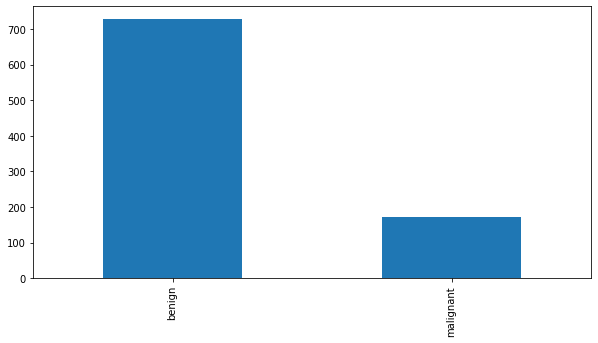

In [9]:
fig, ax = plt.subplots(1, 1, figsize= (10, 5))
df['CLASS'].value_counts().plot(kind='bar', ax=ax)

In [10]:
gt[:10]

array(['benign', 'benign', 'malignant', 'malignant', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign'], dtype=object)

In [11]:
filenames[:10]

array(['ISIC_0000000', 'ISIC_0000001', 'ISIC_0000002', 'ISIC_0000004',
       'ISIC_0000006', 'ISIC_0000007', 'ISIC_0000008', 'ISIC_0000009',
       'ISIC_0000010', 'ISIC_0000011'], dtype=object)

In [12]:
labels = []
for s in gt:
    if s == "benign" or s == 0.0 :
        labels.append(0)
    if s == "malignant" or s == 1.0:
        labels.append(1)
        
len(labels)

900

In [13]:
labels[:10]

[0, 0, 1, 1, 0, 0, 0, 0, 0, 0]

In [20]:
inp_feat = []
g_t = []


cancer = []
non_cancer = []

for f, l in zip(filenames[:], labels[:]):
    f = "{}/{}.jpg".format(IMAGES, f)
    img = get_data(f)
    inp_feat.append(img)
    g_t.append(l)
    if l == 1:
        cancer.append(img)
    if l == 0:
        non_cancer.append(img)
    else:
        pass
    img = None

# make nummpy arrays
inp_feat = np.array(inp_feat)
g_t = np.array(g_t)

cancer = np.array(cancer)
non_cancer = np.array(non_cancer)

print(inp_feat.shape, g_t.shape)
print(cancer.shape, non_cancer.shape)

(900, 299, 299, 3) (900,)
(173, 299, 299, 3) (727, 299, 299, 3)


In [23]:
np.save("dataset/ISIC2016/cancer.npy", cancer)
np.save("dataset/ISIC2016/non_cancer.npy", non_cancer)

In [21]:
# one hot encoded vectors
num_classes = 2
g_t_cat = np_utils.to_categorical(g_t,num_classes)
print(g_t_cat.shape)

(900, 2)


In [22]:
flat = np.array([np.argmax(pred) for pred in g_t_cat])
np.count_nonzero(flat == 1), np.count_nonzero(flat == 0)

(173, 727)

In [18]:
g_t_cat[:4]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

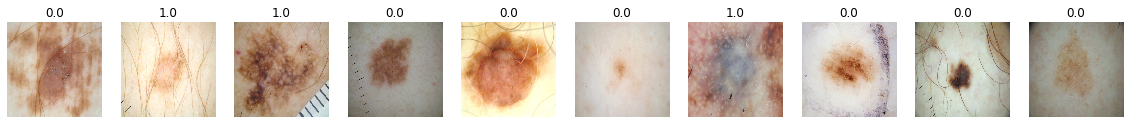

In [19]:
helpers.imshow_group(inp_feat[-10:], g_t[-10:])

In [20]:
inp_feat.shape, g_t_cat.shape

((379, 299, 299, 3), (379, 2))

In [21]:
img_3d = inp_feat[0]
img_flat = img_3d.flatten()
print(min(img_flat), max(img_flat))

21 245


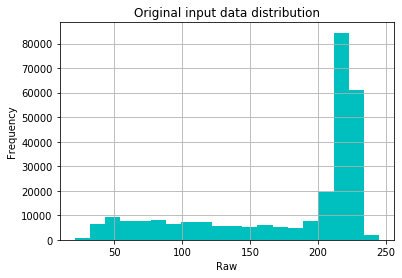

In [22]:
plt.hist(img_flat, bins=20, color='c')
plt.title("Original input data distribution")
plt.xlabel("Raw")
plt.grid(True)
plt.ylabel("Frequency")
plt.show()

In [23]:
np.save("dataset/ISIC2016/x_test.npy", inp_feat)
np.save("dataset/ISIC2016/y_test.npy", g_t_cat)
print("Done!")

Done!
